# Hand Written Digits Project

Data reference link : https://datahub.io/machine-learning/pendigits#readme

# Exploratory Data Analysis and Visualization

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
pendigits_txt = pd.read_csv("pendigits_txt.csv")
df = pendigits_txt.copy()

In [3]:
df.sample(5)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
4850,20,88,58,100,89,79,43,57,67,49,100,25,59,2,0,0,3
9023,13,68,27,100,56,86,34,44,0,9,0,0,50,0,100,8,2
7161,0,83,31,100,48,74,28,42,3,14,27,0,66,1,100,4,2
4725,0,82,38,100,71,79,40,51,59,41,100,20,64,0,9,5,3
6465,0,44,41,62,78,85,100,100,87,75,70,50,55,25,41,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


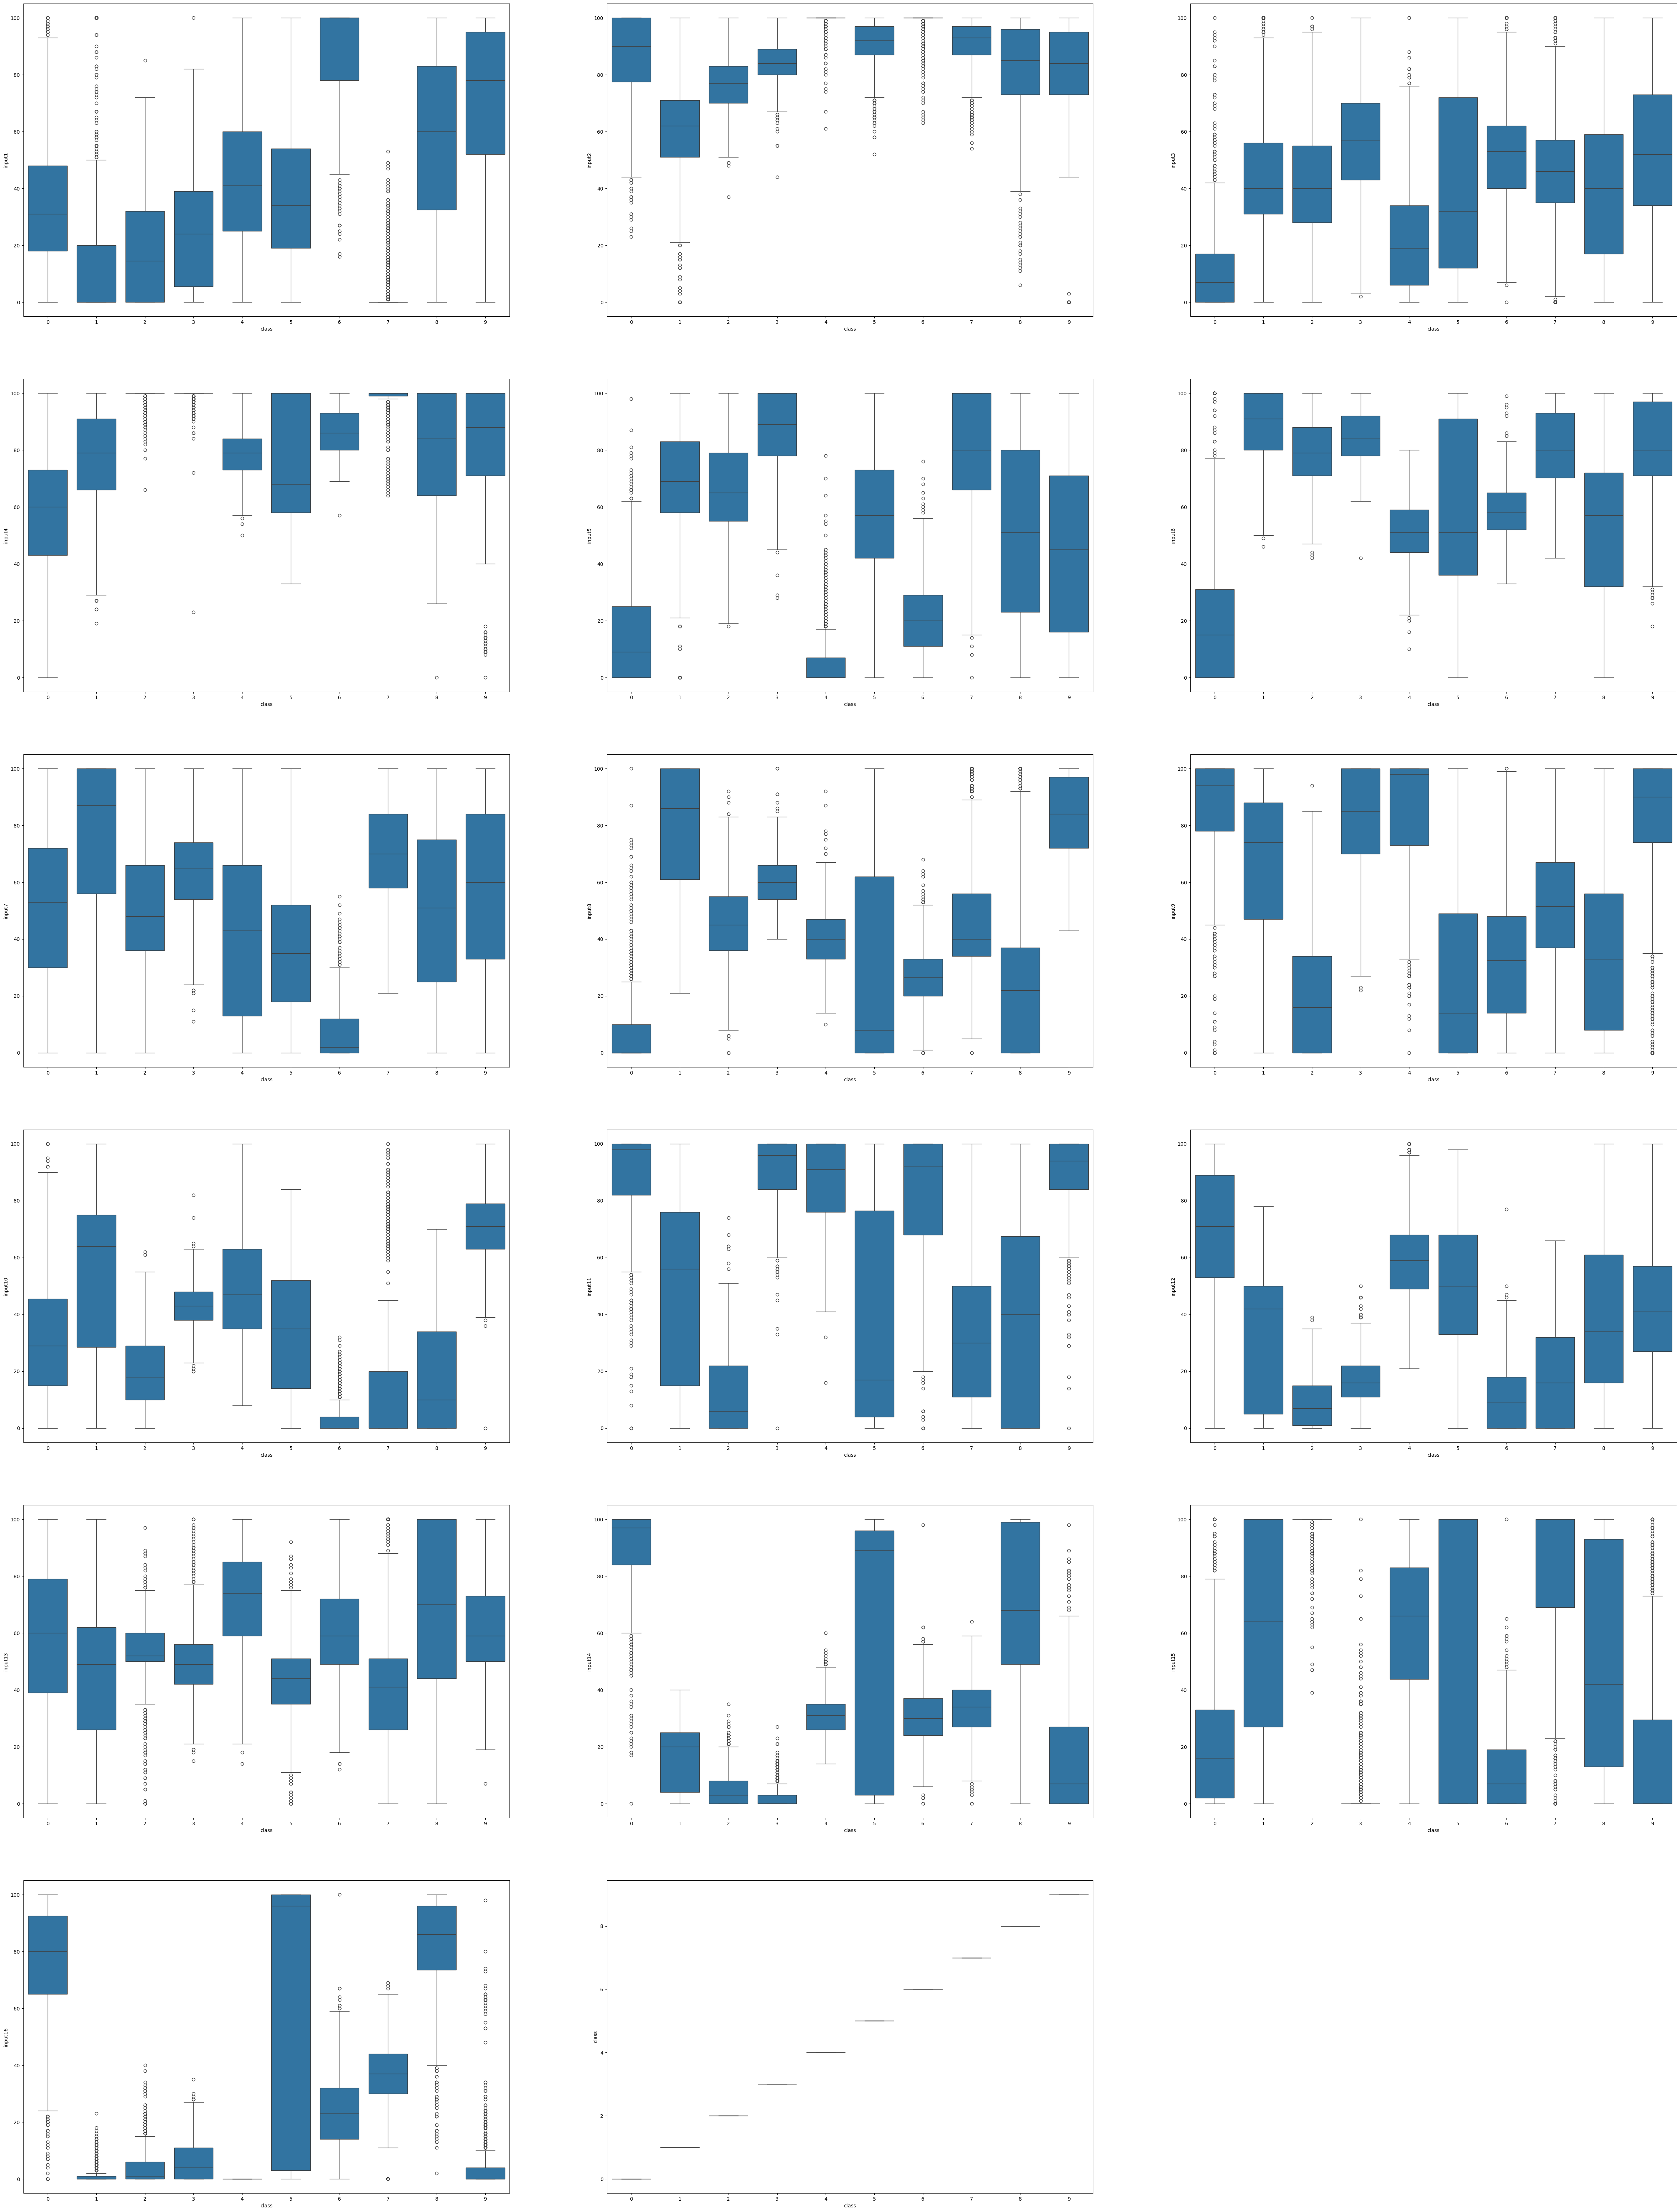

In [8]:
index = 0
plt.figure(figsize=(60,80))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(6,3,index)
        sns.boxplot(x='class',y=feature,data=df)

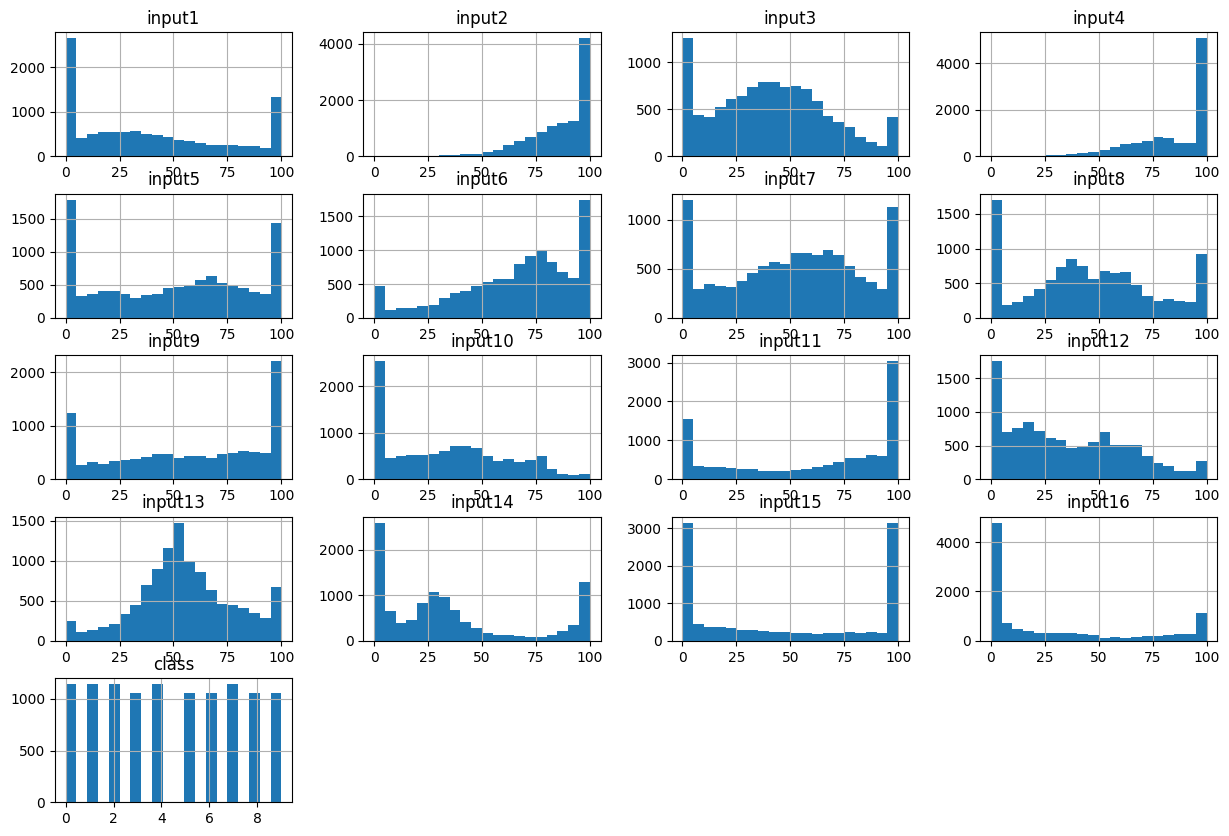

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [10]:
df["class"].value_counts()

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

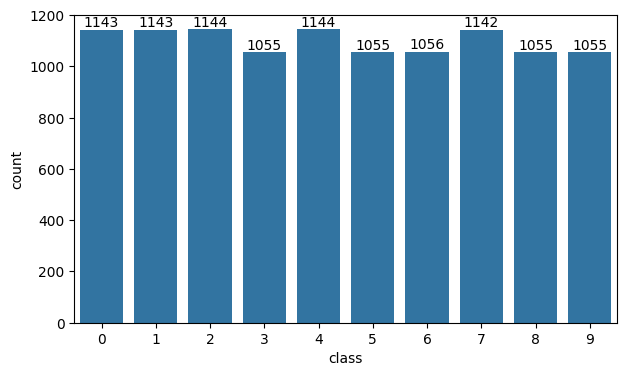

In [11]:
ax = sns.countplot(x="class", data = df)
ax.bar_label(ax.containers[0]);

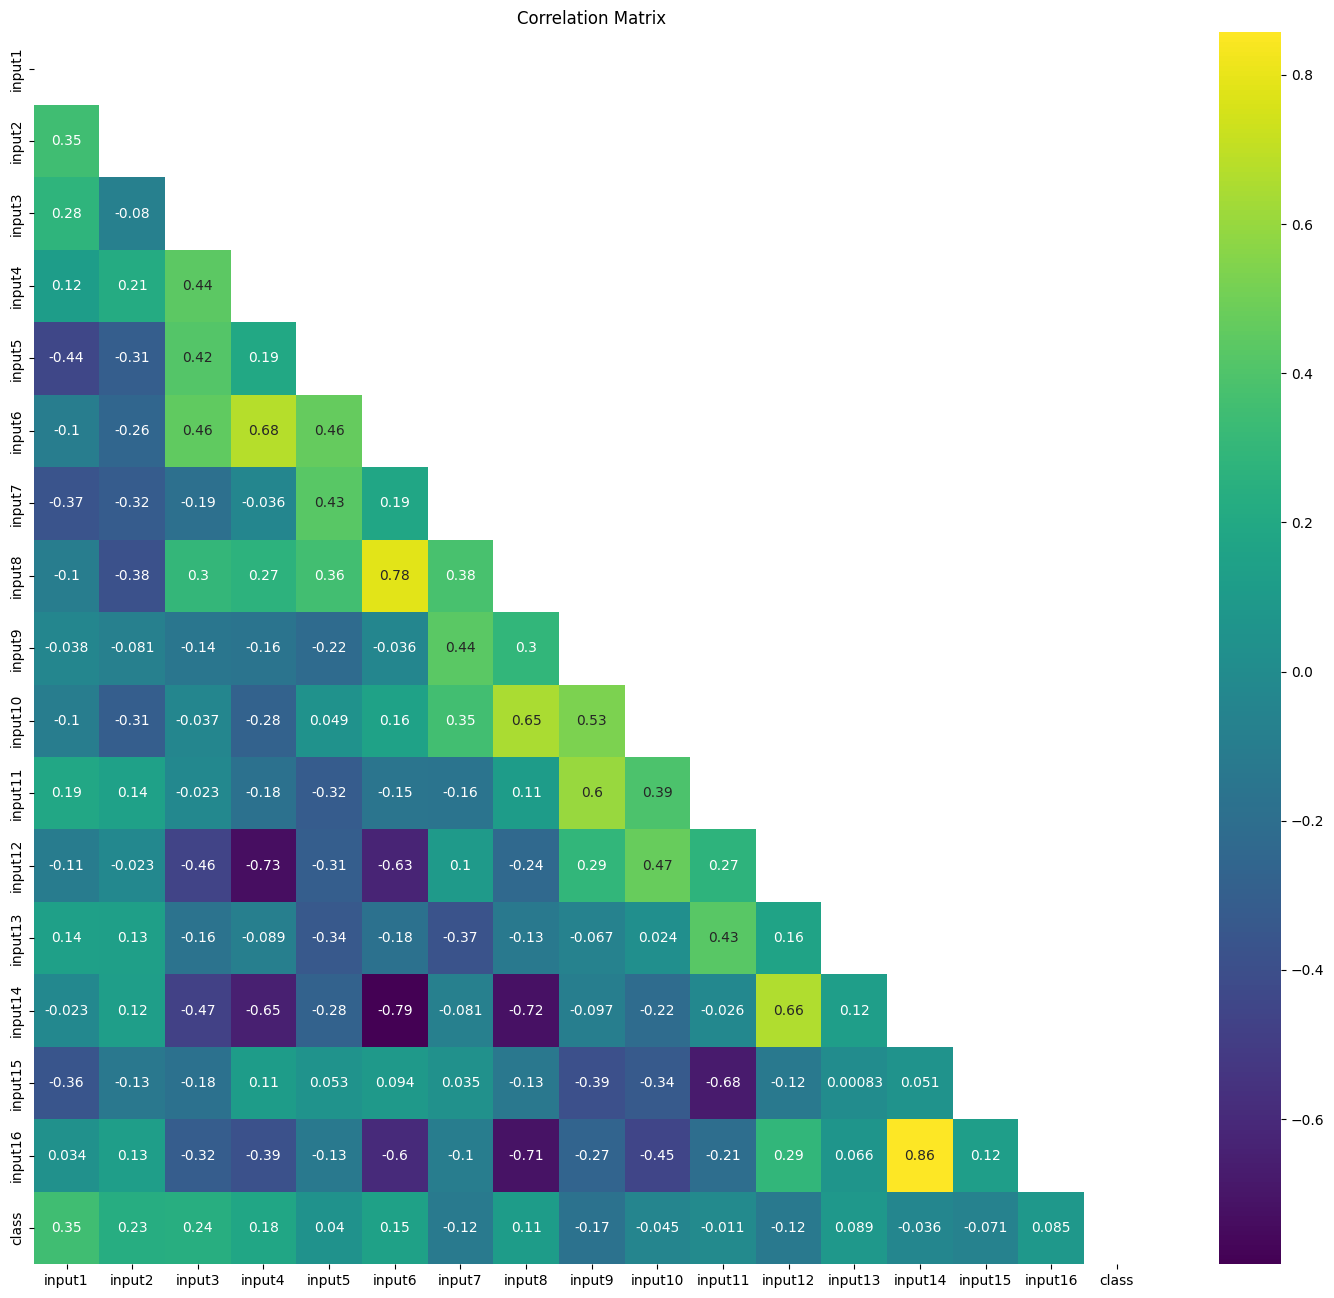

In [12]:
plt.figure(figsize=(18,16))
correlation_matrix = df.select_dtypes("number").corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis',mask=mask)
plt.title("Correlation Matrix")

plt.show()

In [13]:
df.sample(1)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
7608,8,96,55,100,62,67,42,30,25,0,0,36,41,49,100,50,7


# Modelling

## Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop("class", axis = 1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [16]:
X_train.sample(3)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
10026,27,95,0,62,9,20,57,0,100,27,98,70,61,100,8,85
10571,78,82,26,100,0,69,77,36,66,0,7,24,70,62,100,95
6152,0,88,48,100,78,77,43,51,55,41,100,22,67,0,16,7


In [17]:
X_test.sample(3)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
4475,45,92,69,100,69,70,60,44,100,28,78,4,33,0,0,15
1756,53,100,25,70,0,39,50,34,100,42,85,64,77,32,80,0
10703,37,94,72,100,100,93,76,74,59,51,60,25,34,8,0,0


# Support Vector Machine (SVM) Classifier

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix



In [19]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
SVM_model = Pipeline(steps=steps)

In [20]:
def eval_metric(SVM_model, X_train, y_train, X_test, y_test):
    y_train_pred = SVM_model.predict(X_train)
    y_pred = SVM_model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


SVM_model.fit(X_train, y_train)
eval_metric(SVM_model, X_train, y_train, X_test, y_test)

Test_Set
[[181   0   0   0   0   0   1   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0   1 178   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 187   0   0   0   0   0]
 [  0   0   0   2   0 159   0   0   0   0]
 [  0   0   0   0   0   0 167   0   0   0]
 [  0   1   0   0   0   0   0 188   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 140]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       182
           1       0.99      1.00      0.99       160
           2       1.00      0.99      1.00       179
           3       0.99      1.00      0.99       140
           4       1.00      1.00      1.00       187
           5       1.00      0.99      0.99       161
           6       0.99      1.00      1.00       167
           7       1.00      0.99      1.00       189
           8       1.00      1.00      1.00       144
           9       

## Support Vector Machine (SVM) Classifier CV

In [21]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
SVM_model = Pipeline(steps= operations)

scores = cross_validate(SVM_model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.994755
train_accuracy           0.995933
test_precision_macro     0.994830
train_precision_macro    0.995957
test_recall_macro        0.994769
train_recall_macro       0.995941
test_f1_macro            0.994768
train_f1_macro           0.995944
dtype: float64

## Grid Search CV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
SVM_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [44]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.2, 0.3],
             "SVC__kernel":["rbf", "linear"]}

In [45]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
SVM_model = Pipeline(steps= operations)


SVM_model_grid_model = GridSearchCV(SVM_model, param_grid, scoring ="accuracy", cv=10)

In [47]:
SVM_model_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [48]:
SVM_model_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.2, 'SVC__kernel': 'rbf'}

In [49]:
pd.DataFrame(SVM_model_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__gamma,param_SVC__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.589570,0.113489,1.027258,0.020509,0.001,scale,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.105882,0.105882,0.105882,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.105212,0.000439,29
1,1.012368,0.015944,0.175612,0.004788,0.001,scale,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.874866,0.903743,0.890909,0.882227,0.898287,0.890792,0.897216,0.889722,0.886510,0.882227,0.889650,0.008197,24
2,4.465208,0.027359,1.016014,0.022184,0.001,auto,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.105882,0.105882,0.105882,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.105212,0.000439,29
3,1.011183,0.013191,0.171540,0.008233,0.001,auto,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.874866,0.903743,0.890909,0.882227,0.898287,0.890792,0.897216,0.889722,0.886510,0.882227,0.889650,0.008197,24
4,4.465955,0.023699,1.008033,0.015214,0.001,0.2,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.105882,0.105882,0.105882,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.105212,0.000439,29
5,1.027050,0.017259,0.175492,0.008570,0.001,0.2,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.874866,0.903743,0.890909,0.882227,0.898287,0.890792,0.897216,0.889722,0.886510,0.882227,0.889650,0.008197,24
6,4.460260,0.024665,0.994918,0.018001,0.001,0.3,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.105882,0.105882,0.105882,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.104925,0.105212,0.000439,29
7,1.040664,0.038657,0.176275,0.007056,0.001,0.3,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.874866,0.903743,0.890909,0.882227,0.898287,0.890792,0.897216,0.889722,0.886510,0.882227,0.889650,0.008197,24
8,0.872328,0.018445,0.493343,0.010223,0.05,scale,rbf,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.972193,0.977540,0.958289,0.965739,0.973233,0.961456,0.980728,0.975375,0.978587,0.963597,0.970674,0.007447,15
9,0.223002,0.005806,0.051886,0.001234,0.05,scale,linear,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.977540,0.980749,0.972193,0.970021,0.975375,0.974304,0.970021,0.978587,0.979657,0.975375,0.975382,0.003617,10


In [50]:
SVM_model_grid_model.best_index_

28

In [51]:
SVM_model_grid_model.best_score_

0.9876913739994733

In [52]:
eval_metric(SVM_model_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[180   0   0   0   0   0   1   0   1   0]
 [  0 158   0   1   0   0   0   1   0   0]
 [  0   4 175   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 186   1   0   0   0   0]
 [  0   0   0   2   0 157   0   0   2   0]
 [  0   0   0   0   0   0 166   0   1   0]
 [  0   1   0   0   0   0   0 188   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 140]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       182
           1       0.97      0.99      0.98       160
           2       1.00      0.98      0.99       179
           3       0.98      1.00      0.99       140
           4       1.00      0.99      1.00       187
           5       0.99      0.98      0.98       161
           6       0.99      0.99      0.99       167
           7       0.99      0.99      0.99       189
           8       0.97      1.00      0.99       144
           9       

# Decision Tree (DT) Classifier

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [62]:
steps = [("scaler", StandardScaler()), ("DT_model", DecisionTreeClassifier(random_state=101))]
DT_model = Pipeline(steps=steps)
DT_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

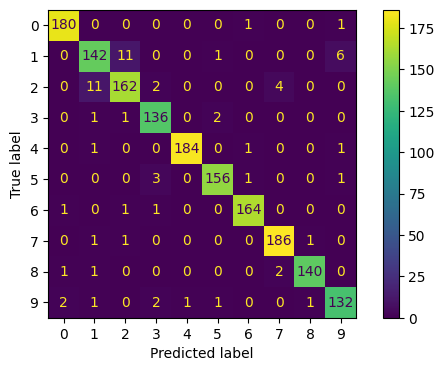

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test)


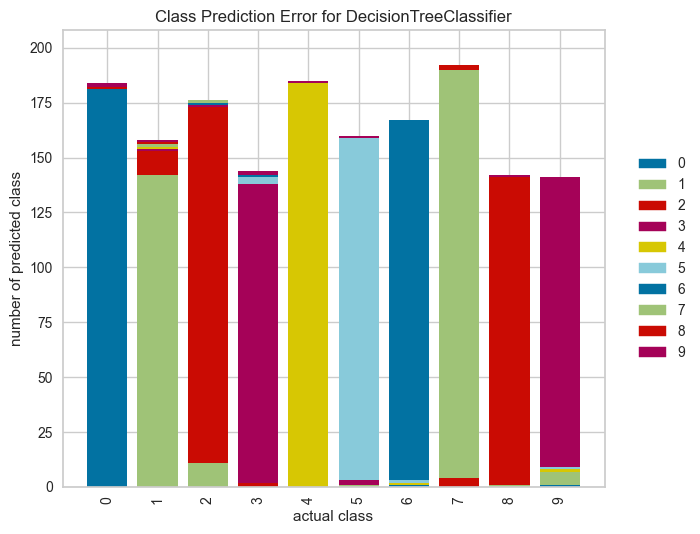

In [67]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

**Decision Tree Algoritmasında Overfitting Sorunu**

- Decision tree, modelleme yapısının en büyük handikaplarından biri olan çok çabuk overfit'e (aşırı uyuma) düşme eğilimindedir.
- Aşağıdaki skorlar herhangi bir overfit durumu göstermese de, dallanmanın fazla olması overfit'e yol açabilir.
- Karar ağaçlarında dallanma ne kadar artarsa, modelin eğitim verilerine aşırı uyum sağlaması ve genelleştirilebilirliğinin azalması riski de artar.

In [68]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

# datamız inbalanced olmasına rağmen skorlarımız  birbirine yakın çıktığından dataya herhangi bir imbalanced
# muamalesinde bulunmayacağız.

Test_Set
[[180   0   0   0   0   0   1   0   0   1]
 [  0 142  11   0   0   1   0   0   0   6]
 [  0  11 162   2   0   0   0   4   0   0]
 [  0   1   1 136   0   2   0   0   0   0]
 [  0   1   0   0 184   0   1   0   0   1]
 [  0   0   0   3   0 156   1   0   0   1]
 [  1   0   1   1   0   0 164   0   0   0]
 [  0   1   1   0   0   0   0 186   1   0]
 [  1   1   0   0   0   0   0   2 140   0]
 [  2   1   0   2   1   1   0   0   1 132]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       182
           1       0.90      0.89      0.89       160
           2       0.92      0.91      0.91       179
           3       0.94      0.97      0.96       140
           4       0.99      0.98      0.99       187
           5       0.97      0.97      0.97       161
           6       0.98      0.98      0.98       167
           7       0.97      0.98      0.98       189
           8       0.99      0.97      0.98       144
           9       

## Cross Validation (CV) & Evaluating ROC Curves and AUC

- CV skorlarının, modelin genel skorlarına benzer olup olmadığını değerlendireceğiz.
- Çoklu sınıf (multiclass) durumlarında, genellikle sınıf skorlarına değil, ortalama skorlara (average) bakılır.

**Değerlendirme Metrikleri:**
- **Micro Average**: Tüm sınıflar arasında skorlar dengeliyse kullanılır. Tüm sınıfların toplam performansını ölçer.
- **Macro Average**: Veri setinde dengesizlik varsa tercih edilir. Tüm sınıfların performansını eşit ağırlıkta değerlendirir.
- **Weighted Average**: Veri dengesiz ama daha yüksek sayıdaki sınıfa göre değerlendirme yapmak isteniyorsa kullanılır. Sınıf frekanslarına göre ağırlıklandırılmış ortalama sağlar.

Bu metrikler, çoklu sınıf sınıflandırma problemlerinde farklı sınıfların dengesiz dağılımını ve önemini dikkate alarak daha adil ve doğru bir değerlendirme yapılmasını sağlar. Özellikle, her sınıfın model performansına etkisini farklı şekillerde dikkate alan bu metrikler, modelin genel performansının daha kapsamlı bir değerlendirilmesine olanak tanır.

In [72]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [71]:
steps = [("scaler", StandardScaler()), ("DT_model", DecisionTreeClassifier(random_state=101))]
DT_model = Pipeline(steps=steps)
scores = cross_validate(DT_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
3,0.056879,0.005985,0.960428,1.0,0.960428,1.0,0.960428,1.0,0.960428,1.0
4,0.050853,0.005984,0.953961,1.0,0.953961,1.0,0.953961,1.0,0.953961,1.0
5,0.051861,0.004987,0.959315,1.0,0.959315,1.0,0.959315,1.0,0.959315,1.0
6,0.051142,0.005985,0.959315,1.0,0.959315,1.0,0.959315,1.0,0.959315,1.0
7,0.051858,0.005989,0.962527,1.0,0.962527,1.0,0.962527,1.0,0.962527,1.0
8,0.051080,0.005990,0.946467,1.0,0.946467,1.0,0.946467,1.0,0.946467,1.0
9,0.051857,0.005983,0.961456,1.0,0.961456,1.0,0.961456,1.0,0.961456,1.0
10,0.050827,0.006022,0.964668,1.0,0.964668,1.0,0.964668,1.0,0.964668,1.0


In [73]:
df_scores.mean()[2:]

test_accuracy            0.958685
train_accuracy           1.000000
test_precision_micro     0.958685
train_precision_micro    1.000000
test_recall_micro        0.958685
train_recall_micro       1.000000
test_f1_micro            0.958685
train_f1_micro           1.000000
dtype: float64

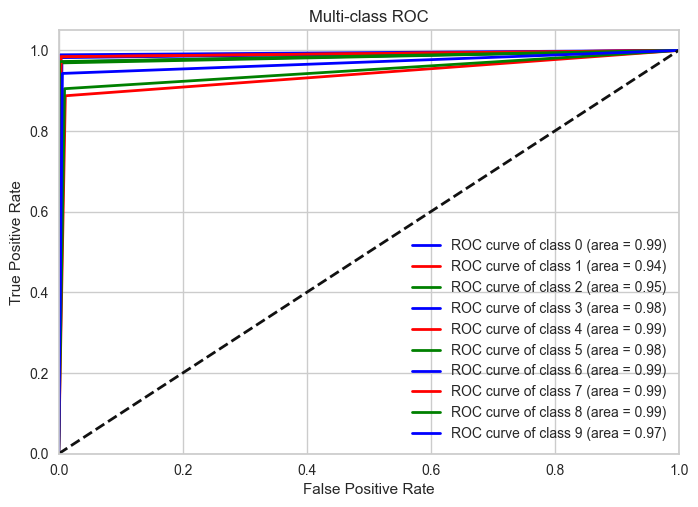

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

DT_model.fit(X_train, y_train)

# Hedef değişkeni ikili formata dönüştürüyoruz
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Tahmin olasılıklarını alıyoruz
y_pred_proba = DT_model.predict_proba(X_test)

# Her sınıf için ROC eğrisi ve AUC hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çiziyoruz
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
steps = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(random_state=101))]
RF_model = Pipeline(steps=steps)
RF_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model', RandomForestClassifier(random_state=101))])

## Model Performance

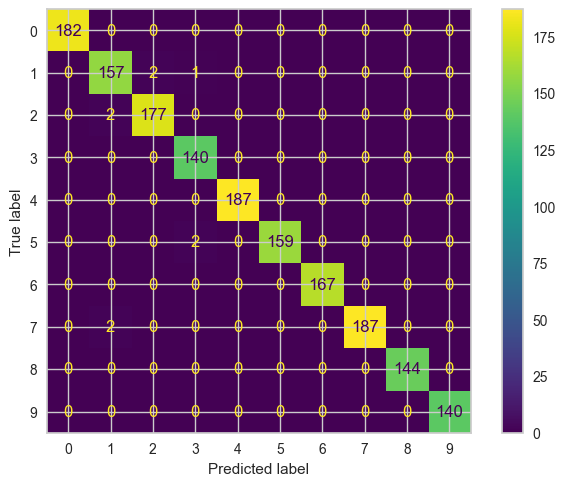

In [157]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    

ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test, cmap="viridis");

# predict işlemi test datasını train datasındaki unique kategorik verilere göre transforma tabi tutarak numeric verilere 
# dönüştürüyor.

# pipeline içerisinde make_column_transform olduğundan df yapısı tarain datasında olduğu gibi değiştiriliyor ve predict edilmek 
# üzere ilgili modele gönderiliyor

In [158]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[182   0   0   0   0   0   0   0   0   0]
 [  0 157   2   1   0   0   0   0   0   0]
 [  0   2 177   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 187   0   0   0   0   0]
 [  0   0   0   2   0 159   0   0   0   0]
 [  0   0   0   0   0   0 167   0   0   0]
 [  0   2   0   0   0   0   0 187   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       0.98      0.98      0.98       160
           2       0.99      0.99      0.99       179
           3       0.98      1.00      0.99       140
           4       1.00      1.00      1.00       187
           5       1.00      0.99      0.99       161
           6       1.00      1.00      1.00       167
           7       1.00      0.99      0.99       189
           8       1.00      1.00      1.00       144
           9       

In [159]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# overfiting yok

test_accuracy            0.990688
train_accuracy           1.000000
test_precision_micro     0.990688
train_precision_micro    1.000000
test_recall_micro        0.990688
train_recall_micro       1.000000
test_f1_micro            0.990688
train_f1_micro           1.000000
dtype: float64

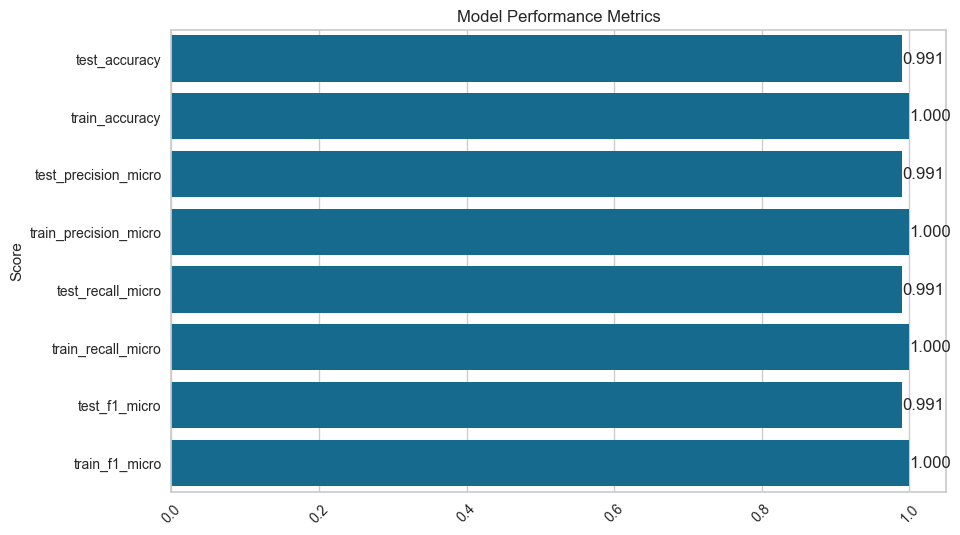

In [160]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f') 
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

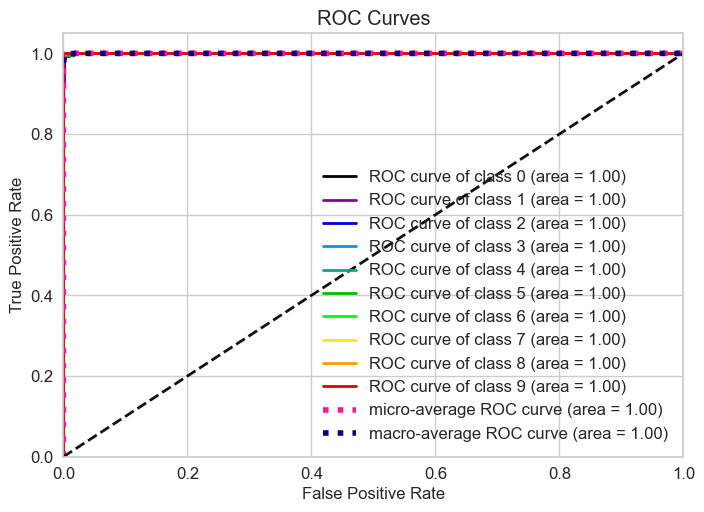

In [162]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();